In [1]:
from collections import defaultdict

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline


import flotilla
sns.set(style='ticks', context='talk')

folder = '/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure1_expression'

flotilla_dir = '/projects/ps-yeolab/obotvinnik/flotilla_projects/'

study = flotilla.embark('singlecell_pnm', flotilla_dir=flotilla_dir)

/home/obotvinnik/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:784: UserWarning: Found matplotlib configuration in ~/.matplotlib/. To conform with the XDG base directory standard, this configuration location has been deprecated on Linux, and the new location is now /home/obotvinnik/.config/matplotlib/. Please move your configuration there to ensure that matplotlib will continue to find it in the future.
  _get_xdg_config_dir())
/home/obotvinnik/workspace-git/flotilla/flotilla/__init__.py:55: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  load_species_data=load_species_data)


2016-01-18 16:10:55	Reading datapackage from /projects/ps-yeolab/obotvinnik/flotilla_projects/singlecell_pnm/datapackage.json
2016-01-18 16:10:55	Parsing datapackage to create a Study object
2016-01-18 16:11:27	Initializing Study
2016-01-18 16:11:27	Initializing Predictor configuration manager for Study
2016-01-18 16:11:27	Predictor ExtraTreesClassifier is of type <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
2016-01-18 16:11:27	Added ExtraTreesClassifier to default predictors
2016-01-18 16:11:27	Predictor ExtraTreesRegressor is of type <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
2016-01-18 16:11:27	Added ExtraTreesRegressor to default predictors
2016-01-18 16:11:27	Predictor GradientBoostingClassifier is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
2016-01-18 16:11:27	Added GradientBoostingClassifier to default predictors
2016-01-18 16:11:27	Predictor GradientBoostingRegressor is of type <class 'sklearn.ensemble.gradient_boosting.G

In [4]:
import matplotlib.pyplot as plt

In [5]:
figure_folder = '{}/violinplots'.format(folder)
! mkdir $figure_folder

In [12]:
sns.set(style='darkgrid', context='talk')

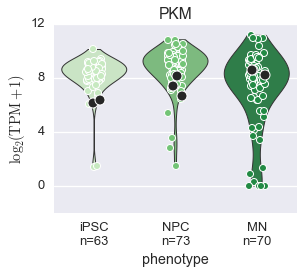

In [42]:
study.plot_gene('PKM', sample_subset='~outlier')
ax = plt.gca()
ax.set(ylabel='$\log_{2}(\mathrm{TPM} + 1)$', title='PKM')
ax.set_yticks([0, 4, 8, 12])
fig = plt.gcf()
fig.savefig('{}/pkm_expression.pdf'.format(figure_folder))

In [15]:
study.phenotype_to_color

{u'MN': u'#228a44', u'NPC': u'#73c476', u'iPSC': u'#c7e9c0'}

In [16]:
%pdb

Automatic pdb calling has been turned ON


In [27]:
sns.set(style='darkgrid', context='talk')

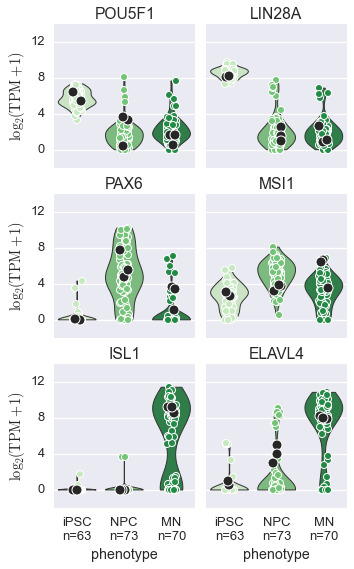

In [43]:
marker_genes = ['POU5F1', 'LIN28A', 'PAX6', 'MSI1', 'ISL1', 'ELAVL4']
fig, axes = plt.subplots(figsize=(5, 8), nrows=3, ncols=2, sharex=True, sharey=True)

for marker_gene, ax in zip(marker_genes, axes.flat):
    feature_id = study.expression.maybe_renamed_to_feature_id(marker_gene)[0]
    study.expression._violinplot(feature_id, ax=ax, 
                                 phenotype_groupby=study.sample_id_to_phenotype, 
                                 phenotype_order=study.phenotype_order,
                                 color=study.phenotype_color_ordered)
    ax.set(title=marker_gene)
    if not ax.is_last_row():
        ax.set(xticks=[], xlabel='')
#     if not ax.is_first_col():
#         ax.set(yticks=[])
#     else:
    if ax.is_first_col():
        ax.set(ylabel='$\log_{2}(\mathrm{TPM} + 1)$')
#     ax.locator_params(nbins=4, axis='y')
ax.set_yticks([0, 4, 8, 12])
fig.tight_layout()
fig.savefig('{}/rbp_tf_marker_genes.pdf'.format(figure_folder))